<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


The following are the libraries we are going to use for this lab:


In [1]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
import skillsnetwork

We will use this function in the lab to plot:


In [2]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

<h2 id="download_data">Download Data</h2>


In this section, you are going to download the data from IBM object storage using **skillsnetwork.prepare** command. <b>skillsnetwork.prepare</b> is a command that's used to download a zip file, unzip it and store it in a specified directory. Locally we store the data in the directory  **/resources/data**. 


In [3]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "/resources/data", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to '../../data'


We then download the files that contain the negative images:


<h2 id="examine_files">Examine Files </h2>


In this section we are going to get a list of the negative image files, then plot them. Then for the first question your job to do something similar to the positive files. 


The path to all the images are stored in the variable  <code>directory</code>. 


In [4]:
directory="/resources/data"

The images with out the cracks are stored in the file <b>Negative</b>


In [5]:
negative='Negative'

We can find the path to the file with all the negative images by  using the function <code>os.path.join</code>. Inputs are the variable directory as well as the variable  <code>negative</code>.


In [6]:
negative_file_path=os.path.join(directory,negative)
negative_file_path

'/resources/data/Negative'

<h3> Loading the File Path of Each Image </h3>


We need each the path of each image, we can find the all the file in the directory  <code>negative_file_path</code> using the function <code>os.listdir</code>, the result is a list. We print out the first three elements of the list.


In [7]:
 os.listdir(negative_file_path)[0:3]

['04642.jpg', '01241.jpg', '13797.jpg']

We need the full path of the image so we join them as above. Here are a few samples  three samples:


In [8]:
[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3]

['/resources/data/Negative/04642.jpg',
 '/resources/data/Negative/01241.jpg',
 '/resources/data/Negative/13797.jpg']

In some cases, we may have files of a different type, so we have to ensure it's of type <b>jpg</b>. We have to check the extension using the method <code> endswith()</code>. The method  <code>endswith()</code> returns True if the string ends with the specified suffix, otherwise, it will return False. Let's do a quick example: 


In [9]:
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

True
False


We now have all the tools to create a list with the path to each image file.  We use a List Comprehensions  to make the code more compact. We assign it to the variable <code>negative_files<code> , sort it in and display the first three elements:


In [10]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['/resources/data/Negative/00001.jpg',
 '/resources/data/Negative/00002.jpg',
 '/resources/data/Negative/00003.jpg']

<b>Using the procedure above, load all the images with cracks paths into a list called positive files, the directory of these images is called Positive.  Make sure the list is sorted and display the first three elements of the list you will need this for the question so remember it.</b>


In [11]:
positive="Positive"
positive_file_path=os.path.join(directory,positive)
positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[0:3]

['/resources/data/Positive/00001.jpg',
 '/resources/data/Positive/00002.jpg',
 '/resources/data/Positive/00003.jpg']

<h2 id="Display">Display and Analyze Image With No Cracks</h2>


We can open an image by using the <code>Image</code> Module in the  <b>PIL</b> library, using the function open. We only require the image path; the input is the path of the image. For example we can load the first image as follows:


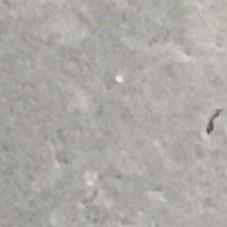

In [13]:

image1 = Image.open(negative_files[0])
# you can view the image directly 
image1 

we can plot the image


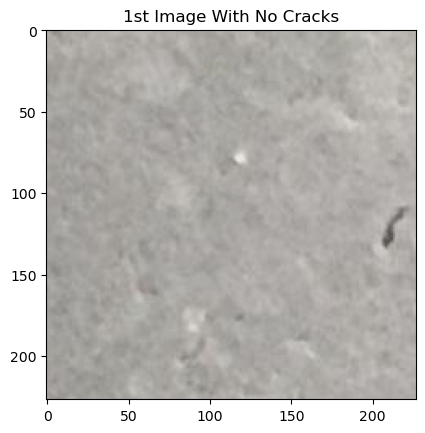

In [14]:
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

We can also plot the second image.


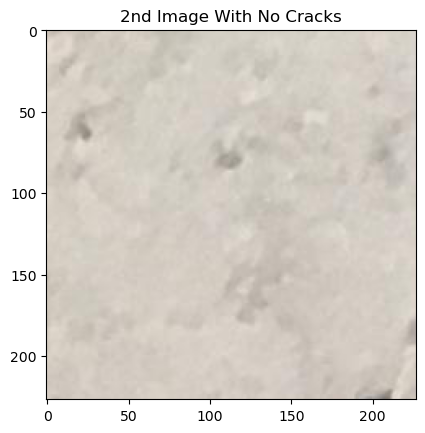

In [15]:
image2 = Image.open(negative_files[1])
plt.imshow(image2)
plt.title("2nd Image With No Cracks")
plt.show()

<b>Plot the first three images for the dataset with cracks. Don't forget. You will be asked in the quiz, so remember the image. </b>



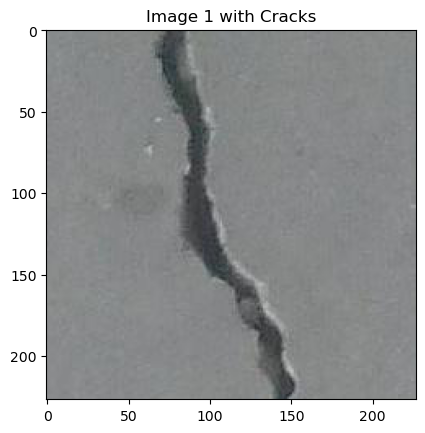

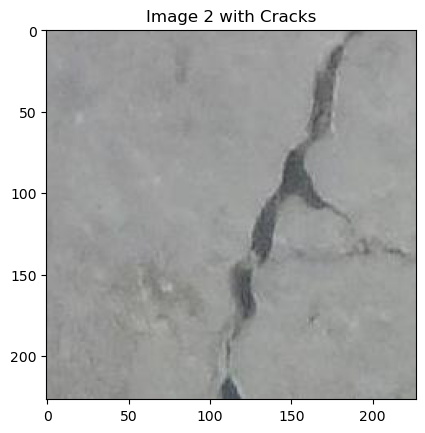

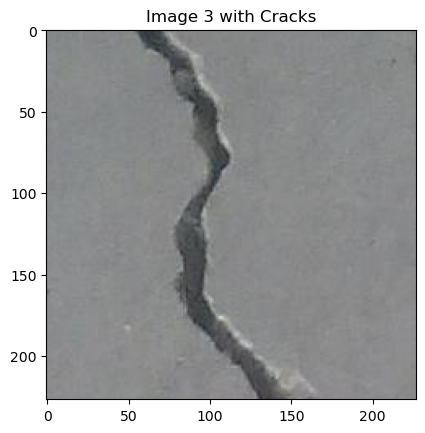

In [17]:
for i in range(3):
    image_path = positive_files[i]  # Get the file path for the ith image
    image = Image.open(image_path)  # Load the image
    plt.imshow(image)               # Plot the image
    plt.title(f"Image {i+1} with Cracks")  # Set the title
    plt.show()

<hr>
